In [63]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import warnings
#warnings.filterwarnings("ignore")

In [64]:
# load the dataset 
print("[INFO] accessing Urdu Dataset")
dataset = pd.read_csv('~/Downloads/datafile2.csv').drop(['Unnamed: 0'], axis=1)
target = dataset["label"]
data = dataset.drop(["label"], axis=1)

[INFO] accessing Urdu Dataset


Text(0.5, 1.0, 'Distribution of Urdu Digits in Dataset')

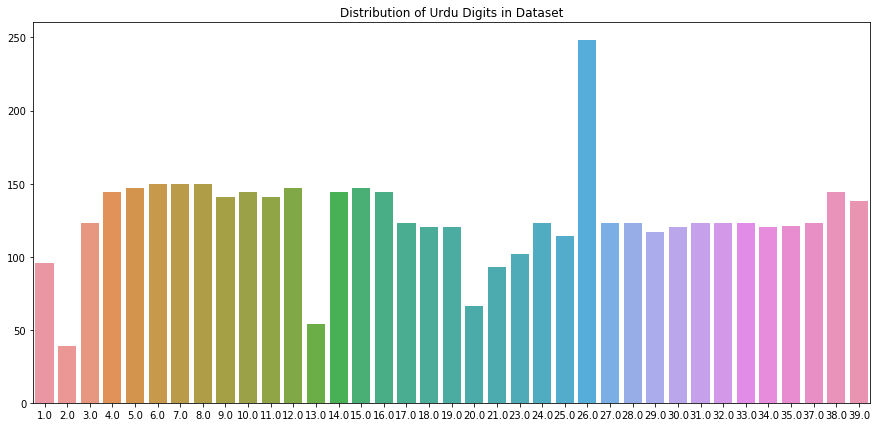

In [65]:
# plot for counting target variable size
import seaborn as sns
lab, val = np.unique(target,return_counts=True)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
sns.barplot(lab,val)
plt.title('Distribution of Urdu Digits in Dataset')

In [66]:
# convert dataframe to numpy array for furthur processing
data = data.to_numpy()
target = target.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(data,
    target.astype("int"), test_size=0.20, random_state=42)

In [67]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3734, 2500)
x_test shape: (934, 2500)
y_train shape: (3734,)
y_test shape: (934,)
3734 train samples
934 test samples


In [68]:
# convert the labels from integers to vectors 
le = LabelBinarizer()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [69]:
mlp = MLPClassifier(hidden_layer_sizes=(500, 100, 100, 100,100, 37), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [70]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 8.05345344
Iteration 2, loss = 4.71008207
Iteration 3, loss = 4.51358288
Iteration 4, loss = 4.31806587
Iteration 5, loss = 4.11241534
Iteration 6, loss = 3.97964496
Iteration 7, loss = 3.93636936
Iteration 8, loss = 3.76450803
Iteration 9, loss = 3.50820052
Iteration 10, loss = 3.41276722
Iteration 11, loss = 3.05407269
Iteration 12, loss = 2.80944152
Iteration 13, loss = 2.45823022
Iteration 14, loss = 2.07042078
Iteration 15, loss = 2.48020295
Iteration 16, loss = 2.01179055
Iteration 17, loss = 2.03727209
Iteration 18, loss = 1.76977942
Iteration 19, loss = 1.70932633
Iteration 20, loss = 1.69593047
Iteration 21, loss = 1.25542256
Iteration 22, loss = 0.95031553
Iteration 23, loss = 0.86802789
Iteration 24, loss = 0.55987634
Iteration 25, loss = 0.43748151
Iteration 26, loss = 0.32044464
Iteration 27, loss = 0.35165958
Iteration 28, loss = 0.27985726
Iteration 29, loss = 0.24853311
Iteration 30, loss = 0.33405114
Iteration 31, loss = 0.39471109
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 100, 100, 100, 100, 37),
              learning_rate='constant', learning_rate_init=0.1, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [71]:
predictions = mlp.predict(x_test)

In [72]:
from sklearn.metrics import classification_report 

print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
        target_names=[str(x) for x in mlp.classes_]))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      1.00      1.00         6
           2       1.00      0.89      0.94        28
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        29
           6       0.92      0.97      0.94        34
           7       1.00      0.91      0.95        32
           8       1.00      1.00      1.00        29
           9       0.98      1.00      0.99        40
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        28
          14       0.94      1.00      0.97        33
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        31
          17       1.00    

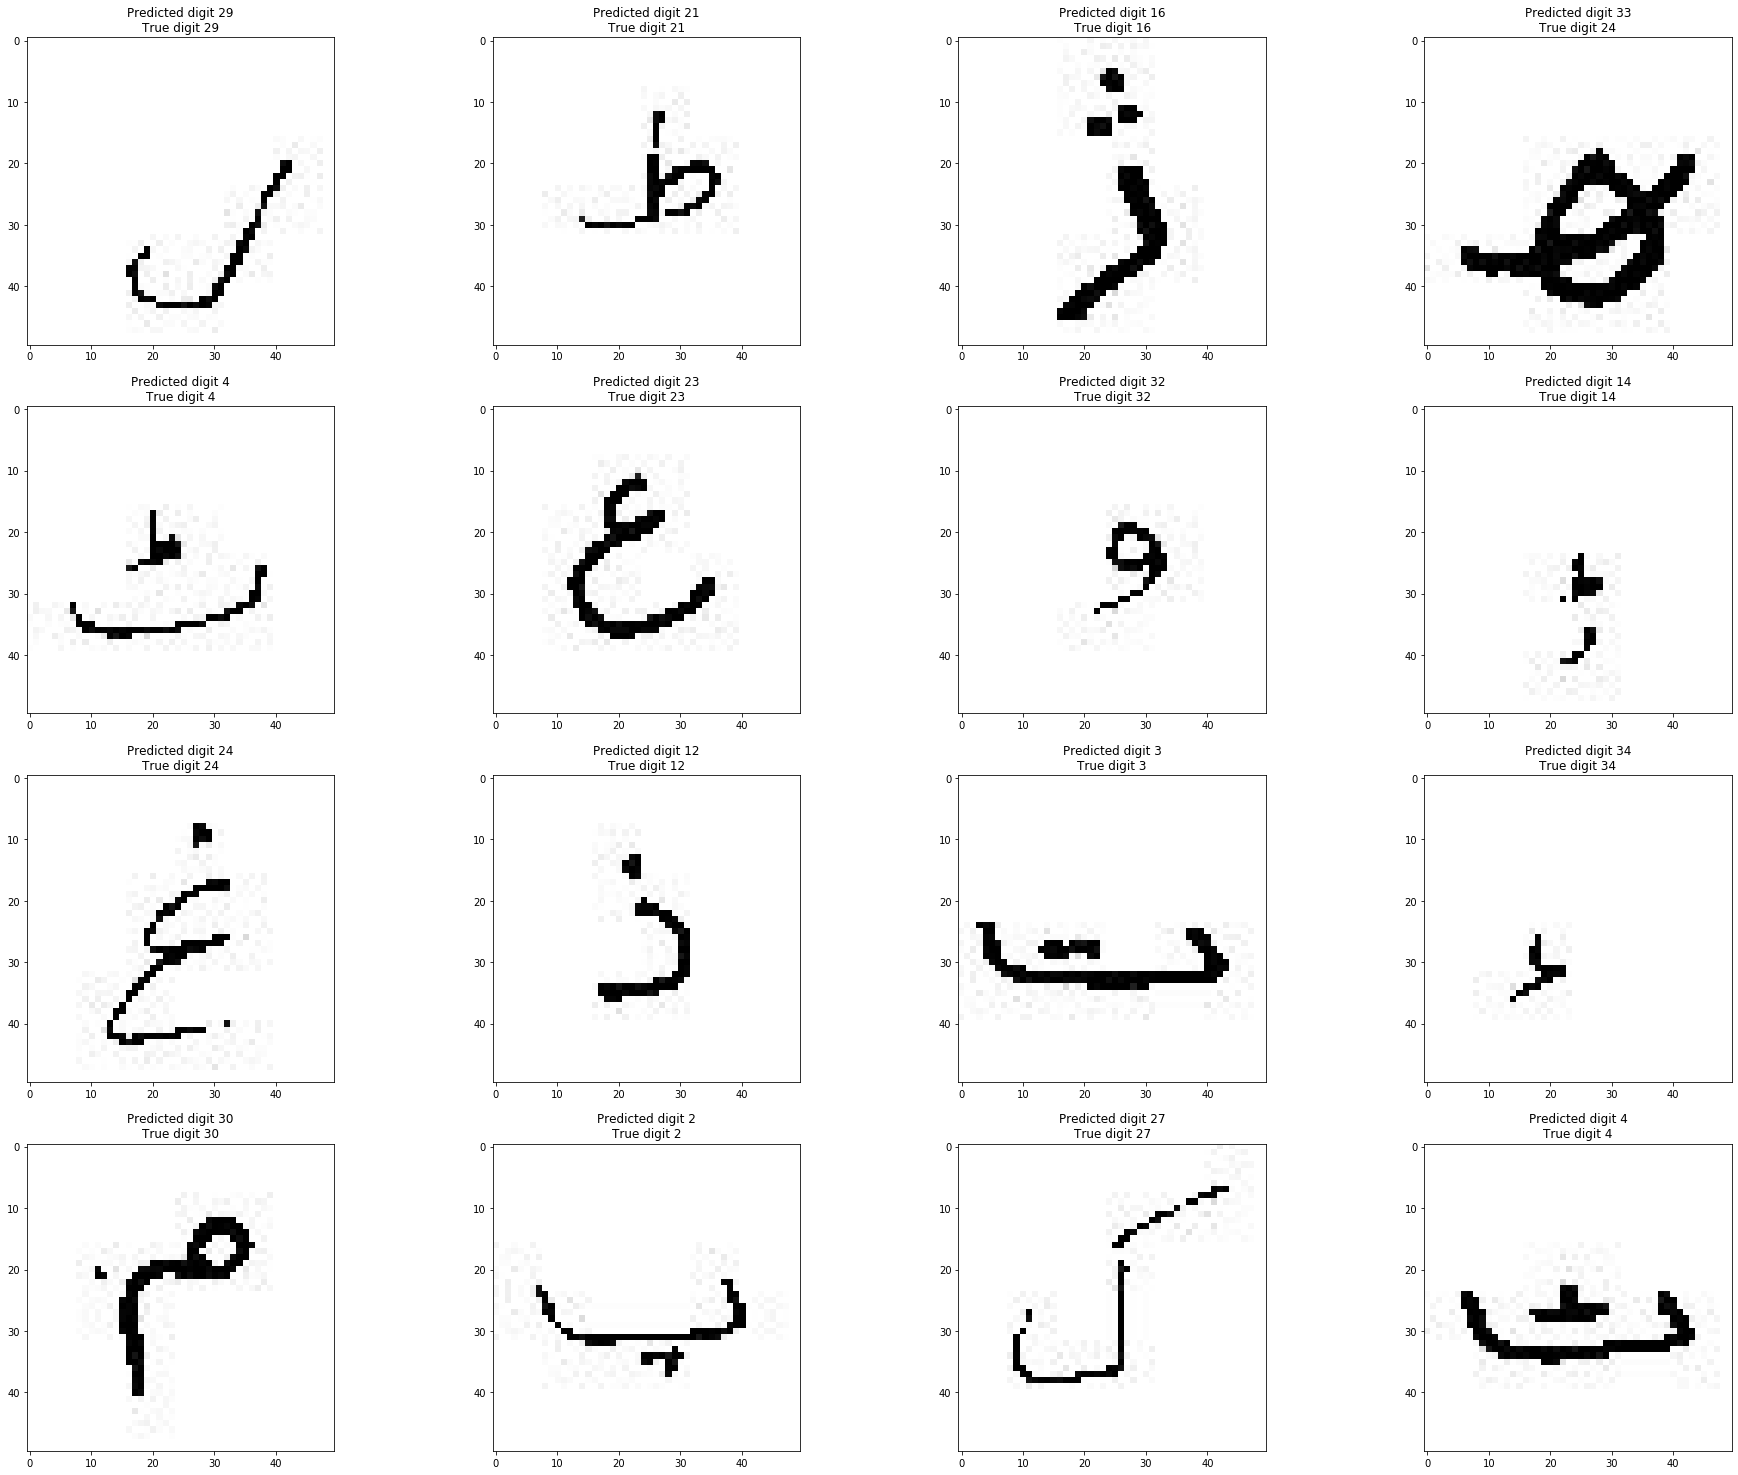

In [73]:
# Show 25 digits of data predicted by svm
fig, axis = plt.subplots(4, 4, figsize=(32, 26))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(50, 50), cmap='binary')
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(predictions.argmax(axis=1)[i],
                                                                y_test.argmax(axis=1)[i]))

In [77]:
from sklearn.metrics import accuracy_score
int(accuracy_score(predictions.argmax(axis=1),y_test.argmax(axis=1)) * 100)

97

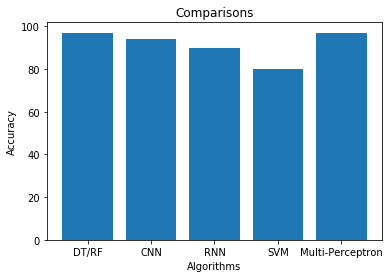

In [80]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6] 
  
# heights of bars 
height = [97, 99, 82, 96, 97 ,40] 
  
# labels for bars 
tick_label = ['DT/RF', 'CNN', 'RNN', 'SVM', 'Multi-Perceptron', 'KNN'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.6) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
plt.title('Comparisons') 
  
# function to show the plot 
plt.show()